# Clasificación SVM

Se ha decidido emplear la funcion `SVC()` de scikit-learn debido a su flexibilidad y efectividad en problemas de clasificación, especialmente cuando se trata de manejar márgenes complejos entre clases. SVC se basa en libSVM, una de las implementaciones más conocidas de máquinas de soporte vectorial, y permite un control preciso sobre los márgenes mediante el parámetro C, que permite ajustar el equilibrio entre el error de clasificación y la amplitud del margen. Además, la implementación de SVC de scikit-learn es altamente eficiente, optimizada y fácil de integrar con otras herramientas de la librería, lo que facilita su implementación en problemas con conjuntos de datos grandes y características complejas.

Otras implementaciones como `LinearSVC` son más eficientes pero presenta limitaciones a la hora de escoger parámetros ya que solo admite el _kernel_ lineal.

In [50]:
import pandas as pd

data_path = './data/'


train_data = pd.read_csv(f'{data_path}train_data.csv')
test_data = pd.read_csv(f'{data_path}test_data.csv')

# Selección de características con mrMr
df_reduce_mrmr = pd.read_csv(f'{data_path}X_train_reduce_mrmr.csv')
df_reduce_mrmr_instances = pd.read_csv(f'{data_path}df_reduce_mrmr_instances.csv')
df_reduce_mrmr_instances_hard = pd.read_csv(f'{data_path}df_reduce_mrmr_instances_hard.csv')
df_reduce_mrmr_instances_GLVQ = pd.read_csv(f'{data_path}df_reduce_mrmr_instances_GLVQ.csv')

# Selección de características con RFC
df_X_train_reduce_RFC = pd.read_csv(f'{data_path}df_X_train_reduce_RFC.csv')
df_reduce_RFC_instances = pd.read_csv(f'{data_path}df_reduce_RFC_instances.csv')
df_reduce_RFC_instances_hard = pd.read_csv(f'{data_path}df_reduce_RFC_instances_hard.csv')
df_reduce_RFC_instances_GLVQ = pd.read_csv(f'{data_path}df_reduce_RFC_instances_GLVQ.csv')

# Mostrar información sobre los DataFrames cargados
print("Datos cargados exitosamente:")
print(f"train_data: {train_data.shape}")
print(f"df_reduce_mrmr: {df_reduce_mrmr.shape}")
print(f"df_reduce_mrmr_instances: {df_reduce_mrmr_instances.shape}")
print(f"df_reduce_mrmr_instances_GLVQ: {df_reduce_mrmr_instances_GLVQ.shape}")
print(f"df_X_train_reduce_RFC: {df_X_train_reduce_RFC.shape}")
print(f"df_reduce_RFC_instances: {df_reduce_RFC_instances.shape}")
print(f"df_reduce_RFC_instances_GLVQ: {df_reduce_RFC_instances_GLVQ.shape}")


Datos cargados exitosamente:
train_data: (256326, 31)
df_reduce_mrmr: (256326, 11)
df_reduce_mrmr_instances: (886, 11)
df_reduce_mrmr_instances_GLVQ: (2, 11)
df_X_train_reduce_RFC: (256326, 11)
df_reduce_RFC_instances: (886, 11)
df_reduce_RFC_instances_GLVQ: (2, 11)


# SVM con mrMr clusterCentroids_soft

### Ajuste de parámetros

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df_reduce_mrmr_instances.drop(columns=['Class'])
y = df_reduce_mrmr_instances['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

#Aplicamos gridsearch para optimizar parámetros, probando distintas combinaciones de estos
svc = SVC() 
parametros = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'class_weight': ['balanced']
}

# Inicializar GridSearchCV
#Usamos scoring f1 porque tiene mas sentido cuando existen clases desbalanceadas como es este caso
ajuste = GridSearchCV(svc, parametros, cv=5, scoring='f1', verbose=3)
ajuste.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = ajuste.best_estimator_.predict(X_test)
print(f"Mejores parámetros: {ajuste.best_params_}")
print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.810 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.752 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.810 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=0.0

### COMPROBAMOS EL RESULTADO EN EL CONJUNTO DE TEST

Dado que solo contamos con dos etiquetas en nuestro dataset no es necesario implementar *One versus Rest (OVR)* ó *One versus All (OVA)* como estrategia de división frente a *One versus One (OVO)*

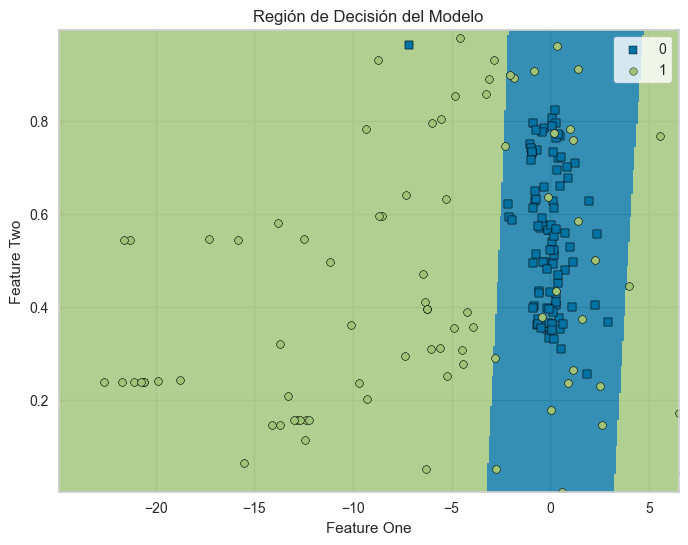

Los parámetros óptimos son: {'C': 100, 'class_weight': 'balanced', 'degree': 2, 'kernel': 'poly'} con una precisión de 0.89 para el conjunto de datos de entrenamiento


In [70]:
import matplotlib.pyplot as plt
from yellowbrick.contrib.classifier import DecisionViz
import numpy as np
from sklearn.model_selection import cross_validate
X = df_reduce_mrmr_instances.drop(columns=['Class'])
y = df_reduce_mrmr_instances['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm=SVC(kernel='poly', C=100, class_weight='balanced', degree=2)
#Visualizamos el comportamiento del modelo con 2 caracteristicas
def pinta_region_decision_model(X, y, model):
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear visualizador de regiones de decisión
    fig, ax = plt.subplots(figsize=(8, 6))
    viz = DecisionViz(model, ax=ax)

    # Ajustar el modelo y dibujar las regiones
    viz.fit(X_train, y_train)
    viz.draw(X_test, y_test)
    viz.finalize()

    plt.title("Región de Decisión del Modelo")
    plt.show()

X_2d = X.iloc[:, :2].values 
y_np = y.values
pinta_region_decision_model(X_2d, y_np, svm)
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)

# Imprimir resultados de cross-validation
print(f"Los parámetros óptimos son: {ajuste.best_params_} con una precisión de {accuracy:.2f} para el conjunto de datos de entrenamiento")


In [71]:
from sklearn.preprocessing import MinMaxScaler
# Cogemos los datos de test y les eliminamos las cracterísticas que no necesitamos
X = test_data.drop(columns=['Class'])
y_test_final = test_data['Class']
columns_to_keep_mrmr = ['V17', 'Time', 'Amount', 'V25', 'V20', 'V7', 'V13', 'V22', 'V19', 'V23']
X_reduce = X[columns_to_keep_mrmr]

#normalizamos la entrada
scaler = MinMaxScaler()
# Normalizar las columnas
X_reduce['Amount'] = scaler.fit_transform(X_reduce[['Amount']])
X_reduce['Time'] = scaler.fit_transform(X_reduce[['Time']])

print(y_test_final.value_counts())

Class
0    28432
1       49
Name: count, dtype: int64


C:\Users\maris\AppData\Local\Temp\ipykernel_18180\3588149006.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduce['Amount'] = scaler.fit_transform(X_reduce[['Amount']])
C:\Users\maris\AppData\Local\Temp\ipykernel_18180\3588149006.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduce['Time'] = scaler.fit_transform(X_reduce[['Time']])


In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_reduce)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_final, y_pred)
report = classification_report(y_test_final, y_pred, target_names=['Correctas', 'Fraudulentas'])
# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

print("Reporte de Clasificación:")
print(report)


Matriz de confusión:
[[28053   379]
 [    9    40]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Correctas       1.00      0.99      0.99     28432
Fraudulentas       0.10      0.82      0.17        49

    accuracy                           0.99     28481
   macro avg       0.55      0.90      0.58     28481
weighted avg       1.00      0.99      0.99     28481



# SVM con mrMr clusterCentroids_hard

## Ajuste de parámetros

In [73]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df_reduce_mrmr_instances_hard.drop(columns=['Class'])
y = df_reduce_mrmr_instances_hard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

#Aplicamos gridsearch para optimizar parámetros, probando distintas combinaciones de estos
svc = SVC() 
parametros = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'class_weight': ['balanced']
}

# Inicializar GridSearchCV
#Usamos scoring f1 porque tiene mas sentido cuando existen clases desbalanceadas como es este caso
ajuste = GridSearchCV(svc, parametros, cv=5, scoring='f1', verbose=3)
ajuste.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = ajuste.best_estimator_.predict(X_test)
print(f"Mejores parámetros: {ajuste.best_params_}")
print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.748 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.810 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.820 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=0.0

### COMPROBAMOS EL RESULTADO EN EL CONJUNTO DE TEST

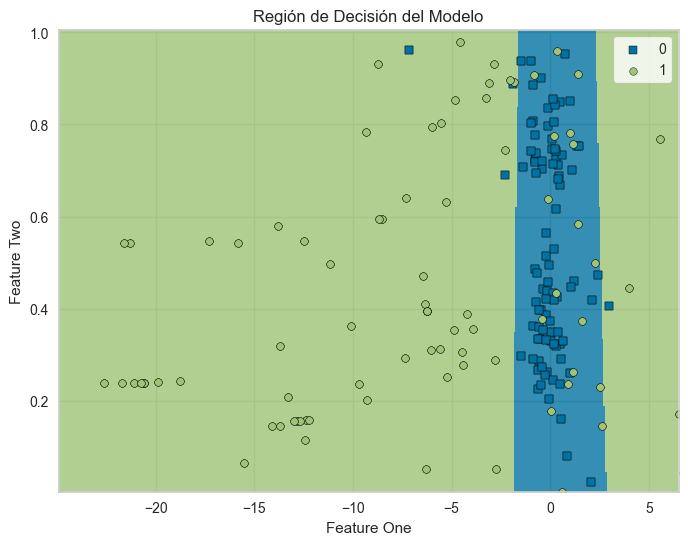

Los parámetros óptimos son: {'C': 100, 'class_weight': 'balanced', 'degree': 2, 'kernel': 'rbf'} con una precisión de 0.87 para el conjunto de datos de entrenamiento


In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
X = df_reduce_mrmr_instances_hard.drop(columns=['Class'])
y = df_reduce_mrmr_instances_hard['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm=SVC(kernel='rbf', C=100, class_weight='balanced', degree=2)
# Visualizamos el comportamiento del modelo
def pinta_region_decision_model(X, y, model):
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear visualizador de regiones de decisión
    fig, ax = plt.subplots(figsize=(8, 6))
    viz = DecisionViz(model, ax=ax)

    # Ajustar el modelo y dibujar las regiones
    viz.fit(X_train, y_train)
    viz.draw(X_test, y_test)
    viz.finalize()

    plt.title("Región de Decisión del Modelo")
    plt.show()

X_2d = X.iloc[:, :2].values 
y_np = y.values
pinta_region_decision_model(X_2d, y_np, svm)

svm.fit(X_train, y_train)
# Realizar cross-validation y calcular accuracy
scores = cross_validate(svm, X_train, y_train, cv=5, scoring=('accuracy'))

# Promedio de las métricas obtenidas durante cross-validation
accuracy_cv = np.mean(scores['test_score'])

# Imprimir resultados de cross-validation
print(f"Los parámetros óptimos son: {ajuste.best_params_} con una precisión de {accuracy_cv:.2f} para el conjunto de datos de entrenamiento")




In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Realizar predicciones en el conjunto de prueba
y_pred_hard = svm.predict(X_reduce)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_final, y_pred_hard)
report = classification_report(y_test_final, y_pred_hard, target_names=['Correctas', 'Fraudulentas'])
# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

print("Reporte de Clasificación:")
print(report)


Matriz de confusión:
[[27933   499]
 [    7    42]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Correctas       1.00      0.98      0.99     28432
Fraudulentas       0.08      0.86      0.14        49

    accuracy                           0.98     28481
   macro avg       0.54      0.92      0.57     28481
weighted avg       1.00      0.98      0.99     28481



# svm con mrMr GLVQ

### Ajuste de parámetros

In [76]:
X = df_reduce_mrmr_instances_GLVQ.drop(columns=['Class'])
y = df_reduce_mrmr_instances_GLVQ['Class']

svm=SVC(kernel='linear', C=100, class_weight='balanced', degree=2)
svm.fit(X, y)
accuracy = svm.score(X_test, y_test)

print(f"Usando GLVQ tenemos una precisión de {accuracy:.2f}")


Usando GLVQ tenemos una precisión de 0.73


### COMPROBAMOS EL RESULTADO EN EL CONJUNTO DE TEST

In [77]:
# Realizar predicciones en el conjunto de prueba
y_pred_glvq = svm.predict(X_reduce)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_final, y_pred_glvq)
report = classification_report(y_test_final, y_pred_glvq, target_names=['Correctas', 'Fraudulentas'])
# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

print("Reporte de Clasificación:")
print(report)

Matriz de confusión:
[[28424     8]
 [   24    25]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Correctas       1.00      1.00      1.00     28432
Fraudulentas       0.76      0.51      0.61        49

    accuracy                           1.00     28481
   macro avg       0.88      0.75      0.80     28481
weighted avg       1.00      1.00      1.00     28481



# SVM con RFC clusterCentroids_soft

### Ajuste de parámetros

In [78]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df_reduce_RFC_instances.drop(columns=['Class'])
y = df_reduce_RFC_instances['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

#Aplicamos gridsearch para optimizar parámetros, probando distintas combinaciones de estos
svc = SVC() 
parametros = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'class_weight': ['balanced']
}

# Inicializar GridSearchCV
#Usamos scoring f1 porque tiene mas sentido cuando existen clases desbalanceadas como es este caso
ajuste = GridSearchCV(svc, parametros, cv=5, scoring='f1', verbose=3)
ajuste.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = ajuste.best_estimator_.predict(X_test)
print(f"Mejores parámetros: {ajuste.best_params_}")
print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.870 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.925 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.919 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=0.0

### COMPROBAMOS EL RESULTADO EN EL CONJUNTO DE TEST

In [79]:
from sklearn.preprocessing import MinMaxScaler
# Cogemos los datos de test y les eliminamos las cracterísticas que no necesitamos
X = test_data.drop(columns=['Class'])
y_test_final = test_data['Class']
columns_to_keep_RFC = ['V17', 'V16', 'V12', 'V14', 'V11', 'V10', 'V9', 'V4', 'V18', 'V7']
X_reduce_RFC = X[columns_to_keep_RFC]

print(y_test_final.value_counts())

Class
0    28432
1       49
Name: count, dtype: int64


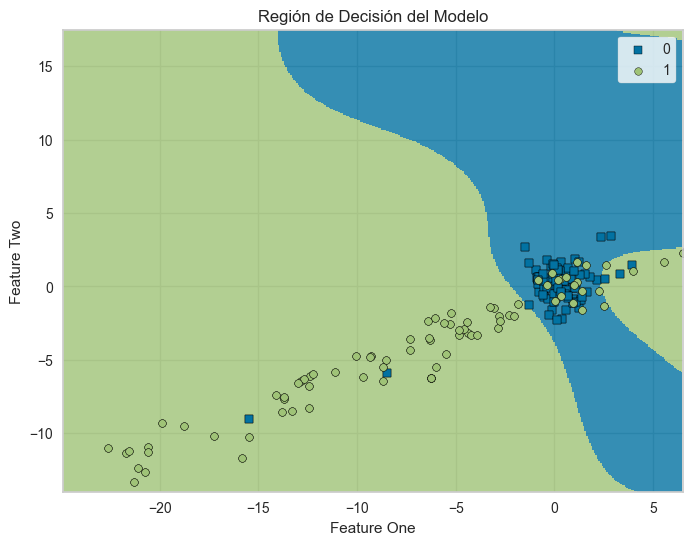

Los parámetros óptimos son: {'C': 100, 'class_weight': 'balanced', 'degree': 2, 'kernel': 'rbf'} con una precisión de 0.92 para el conjunto de datos de entrenamiento


In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
X = df_reduce_RFC_instances.drop(columns=['Class'])
y = df_reduce_RFC_instances['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm=SVC(kernel='rbf', C=100, class_weight='balanced', degree=2)
# Visualizamos el comportamiento del modelo
def pinta_region_decision_model(X, y, model):
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear visualizador de regiones de decisión
    fig, ax = plt.subplots(figsize=(8, 6))
    viz = DecisionViz(model, ax=ax)

    # Ajustar el modelo y dibujar las regiones
    viz.fit(X_train, y_train)
    viz.draw(X_test, y_test)
    viz.finalize()

    plt.title("Región de Decisión del Modelo")
    plt.show()

X_2d = X.iloc[:, :2].values 
y_np = y.values
pinta_region_decision_model(X_2d, y_np, svm)

svm.fit(X_train, y_train)
# Realizar cross-validation y calcular accuracy
scores = cross_validate(svm, X_train, y_train, cv=5, scoring=('accuracy'))

# Promedio de las métricas obtenidas durante cross-validation
accuracy_cv = np.mean(scores['test_score'])

# Imprimir resultados de cross-validation
print(f"Los parámetros óptimos son: {ajuste.best_params_} con una precisión de {accuracy_cv:.2f} para el conjunto de datos de entrenamiento")



In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Realizar predicciones en el conjunto de prueba
y_pred_hard = svm.predict(X_reduce_RFC)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_final, y_pred_hard)
report = classification_report(y_test_final, y_pred_hard, target_names=['Correctas', 'Fraudulentas'])
# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

print("Reporte de Clasificación:")
print(report)

Matriz de confusión:
[[28209   223]
 [    5    44]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Correctas       1.00      0.99      1.00     28432
Fraudulentas       0.16      0.90      0.28        49

    accuracy                           0.99     28481
   macro avg       0.58      0.95      0.64     28481
weighted avg       1.00      0.99      0.99     28481



# SVM con RFC clusterCentroids_hard

### Ajuste de parámetros

In [82]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df_reduce_RFC_instances_hard.drop(columns=['Class'])
y = df_reduce_RFC_instances_hard['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos:")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

#Aplicamos gridsearch para optimizar parámetros, probando distintas combinaciones de estos
svc = SVC() 
parametros = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'class_weight': ['balanced']
}

# Inicializar GridSearchCV
#Usamos scoring f1 porque tiene mas sentido cuando existen clases desbalanceadas como es este caso
ajuste = GridSearchCV(svc, parametros, cv=5, scoring='f1', verbose=3)
ajuste.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = ajuste.best_estimator_.predict(X_test)
print(f"Mejores parámetros: {ajuste.best_params_}")
print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

Dimensiones de los conjuntos:
Conjunto de entrenamiento: (708, 10), (708,)
Conjunto de prueba: (178, 10), (178,)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.870 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.925 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.919 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, degree=2, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, degree=2, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=0.0

### COMPROBAMOS EL RESULTADO EN EL CONJUNTO DE TEST

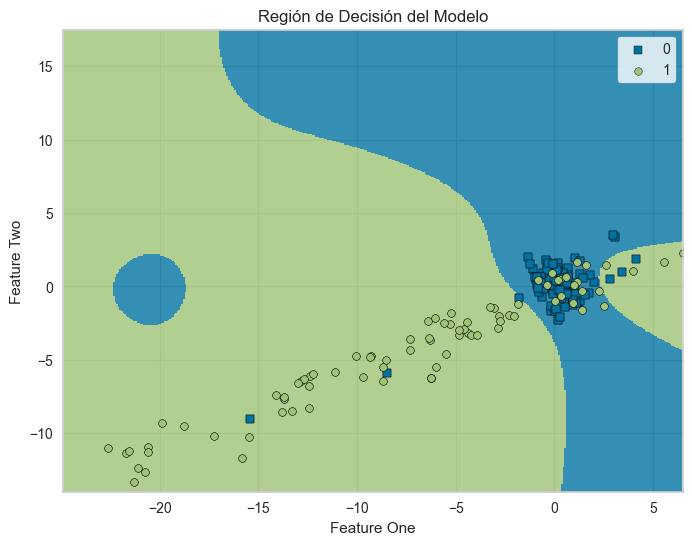

Los parámetros óptimos son: {'C': 100, 'class_weight': 'balanced', 'degree': 2, 'kernel': 'rbf'} con una precisión de 0.92 para el conjunto de datos de entrenamiento


In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate
X = df_reduce_RFC_instances_hard.drop(columns=['Class'])
y = df_reduce_RFC_instances_hard['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm=SVC(kernel='rbf', C=100, class_weight='balanced', degree=2)
# Visualizamos el comportamiento del modelo
def pinta_region_decision_model(X, y, model):
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear visualizador de regiones de decisión
    fig, ax = plt.subplots(figsize=(8, 6))
    viz = DecisionViz(model, ax=ax)

    # Ajustar el modelo y dibujar las regiones
    viz.fit(X_train, y_train)
    viz.draw(X_test, y_test)
    viz.finalize()

    plt.title("Región de Decisión del Modelo")
    plt.show()

X_2d = X.iloc[:, :2].values 
y_np = y.values
pinta_region_decision_model(X_2d, y_np, svm)

svm.fit(X_train, y_train)
# Realizar cross-validation y calcular accuracy
scores = cross_validate(svm, X_train, y_train, cv=5, scoring=('accuracy'))

# Promedio de las métricas obtenidas durante cross-validation
accuracy_cv = np.mean(scores['test_score'])

# Imprimir resultados de cross-validation
print(f"Los parámetros óptimos son: {ajuste.best_params_} con una precisión de {accuracy_cv:.2f} para el conjunto de datos de entrenamiento")



In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Realizar predicciones en el conjunto de prueba
y_pred_hard = svm.predict(X_reduce_RFC)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_final, y_pred_hard)
report = classification_report(y_test_final, y_pred_hard, target_names=['Correctas', 'Fraudulentas'])
# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

print("Reporte de Clasificación:")
print(report)

Matriz de confusión:
[[28191   241]
 [    5    44]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Correctas       1.00      0.99      1.00     28432
Fraudulentas       0.15      0.90      0.26        49

    accuracy                           0.99     28481
   macro avg       0.58      0.94      0.63     28481
weighted avg       1.00      0.99      0.99     28481



# SVM con RFC GLVQ


In [86]:
X = df_reduce_RFC_instances_GLVQ.drop(columns=['Class'])
y = df_reduce_RFC_instances_GLVQ['Class']

svm=SVC(kernel='rbf', C=100, class_weight='balanced', degree=2)
svm.fit(X, y)
accuracy = svm.score(X_test, y_test)

print(f"Usando GLVQ tenemos una precisión de {accuracy:.2f}")

Usando GLVQ tenemos una precisión de 0.88


### COMPROBAMOS EL RESULTADO CON EL CONJUNTO DE TEST

In [87]:
# Realizar predicciones en el conjunto de prueba
y_pred_glvq = svm.predict(X_reduce_RFC)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_final, y_pred_glvq)
report = classification_report(y_test_final, y_pred_glvq, target_names=['Correctas', 'Fraudulentas'])
# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

print("Reporte de Clasificación:")
print(report)

Matriz de confusión:
[[28423     9]
 [   11    38]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Correctas       1.00      1.00      1.00     28432
Fraudulentas       0.81      0.78      0.79        49

    accuracy                           1.00     28481
   macro avg       0.90      0.89      0.90     28481
weighted avg       1.00      1.00      1.00     28481



# Conclusiones

El modelo SVM presenta buenos resultados en precisión, tanto para reducción de características con RFC como para mrmr y reducción de instancias con ClusterCentroids (soft y hard), lo que indica una alta capacidad para generalizar en este tipo de clasificación. Sin embargo, al analizar la matriz de confusión, observamos que el modelo tiene un rendimiento muy desequilibrado: si bien clasifica correctamente la mayoría de las instancias "correctas" en todos los casos, el modelo tiene dificultades significativas con las instancias "fraudulentas", donde los bajos valores de F1-score muestran la dificultad para predecir esta clase.

Finalmente, en el caso de GLVQ para reducción de instancias, que es un enfoque menos convencional, los resultados fueron prometedores. Al emplear el modelo SVM con GLVQ, se obtuvo una precisión de 1.00 en el conjunto de prueba para transacciones correctas, y la matriz de confusión mostró un buen rendimiento, con una alta tasa de aciertos para ambas clases, especialmente para las instancias "fraudulentas", lo que refleja una mejora significativa en cuanto a la precisión y recall para esta clase en comparación con los otros modelos.

En resumen, aunque los modelos SVM han mostrado un rendimiento general satisfactorio en términos de accuracy, la clasificación de las instancias "fraudulentas" sigue siendo un desafío importante. Por lo tanto, el enfoque con GLVQ ha demostrado ser el más eficaz en términos de rendimiento equilibrado entre las clases.